<a href="https://colab.research.google.com/github/SahilBora/-ml-modal-Yes-Bank-stock-price-predictor/blob/main/PhishingLinkScanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install kagglehub pandas numpy scikit-learn tldextract whois joblib requests
import kagglehub
import pandas as pd
import os
import numpy as np
import re
import tldextract
import whois
import joblib
from urllib.parse import urlparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score







In [54]:
# Downloading latest dataset from Kaggle
path = kagglehub.dataset_download("akashkr/phishing-website-dataset")

# Locating the dataset file
csv_files = [file for file in os.listdir(path) if file.endswith(".csv")]
dataset_path = os.path.join(path, csv_files[0]) if csv_files else None

if dataset_path:
    print(f"✅ Dataset downloaded: {dataset_path}")
else:
    print("❌ No CSV file found in the dataset folder.")
if dataset_path:
    df = pd.read_csv(dataset_path)
    print("✅ Dataset Loaded Successfully!")
    print("📌 Columns in Dataset:", df.columns)  # Print column names
else:
    raise FileNotFoundError("Dataset file not found.")


# 🔹 Step 1: Download the dataset
path = kagglehub.dataset_download("akashkr/phishing-website-dataset")

# Locate CSV file
csv_files = [file for file in os.listdir(path) if file.endswith(".csv")]
dataset_path = os.path.join(path, csv_files[0]) if csv_files else None

if dataset_path:
    print(f"✅ Dataset downloaded: {dataset_path}")
else:
    print("❌ No CSV file found in the dataset folder.")
    exit()

# 🔹 Step 2: Load Dataset
df = pd.read_csv(dataset_path)
df.columns = df.columns.str.lower()  # Convert all column names to lowercase
print("📌 Columns in Dataset:", df.columns)


✅ Dataset downloaded: /root/.cache/kagglehub/datasets/akashkr/phishing-website-dataset/versions/2/dataset.csv
✅ Dataset Loaded Successfully!
📌 Columns in Dataset: Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')
✅ Dataset downloaded: /root/.cache/kagglehub/datasets/akashkr/phishing-website-dataset/versions/2/dataset.csv
📌 Columns in Dataset: Index(['index', 'having_iphaving_ip_address', 'urlurl_length',
       'shortin

In [62]:
a=df.head()
print(a)

   index  having_iphaving_ip_address  urlurl_length  shortining_service  \
0      1                        -inf       0.693147            0.693147   
1      2                    0.693147       0.693147            0.693147   
2      3                    0.693147       0.000000            0.693147   
3      4                    0.693147       0.000000            0.693147   
4      5                    0.693147       0.000000                -inf   

   having_at_symbol  double_slash_redirecting  prefix_suffix  \
0          0.693147                      -inf           -inf   
1          0.693147                  0.693147           -inf   
2          0.693147                  0.693147           -inf   
3          0.693147                  0.693147           -inf   
4          0.693147                  0.693147           -inf   

   having_sub_domain  sslfinal_state  domain_registeration_length  ...  \
0                 -1            -inf                         -inf  ...   
1               

<Figure size 1500x1000 with 0 Axes>

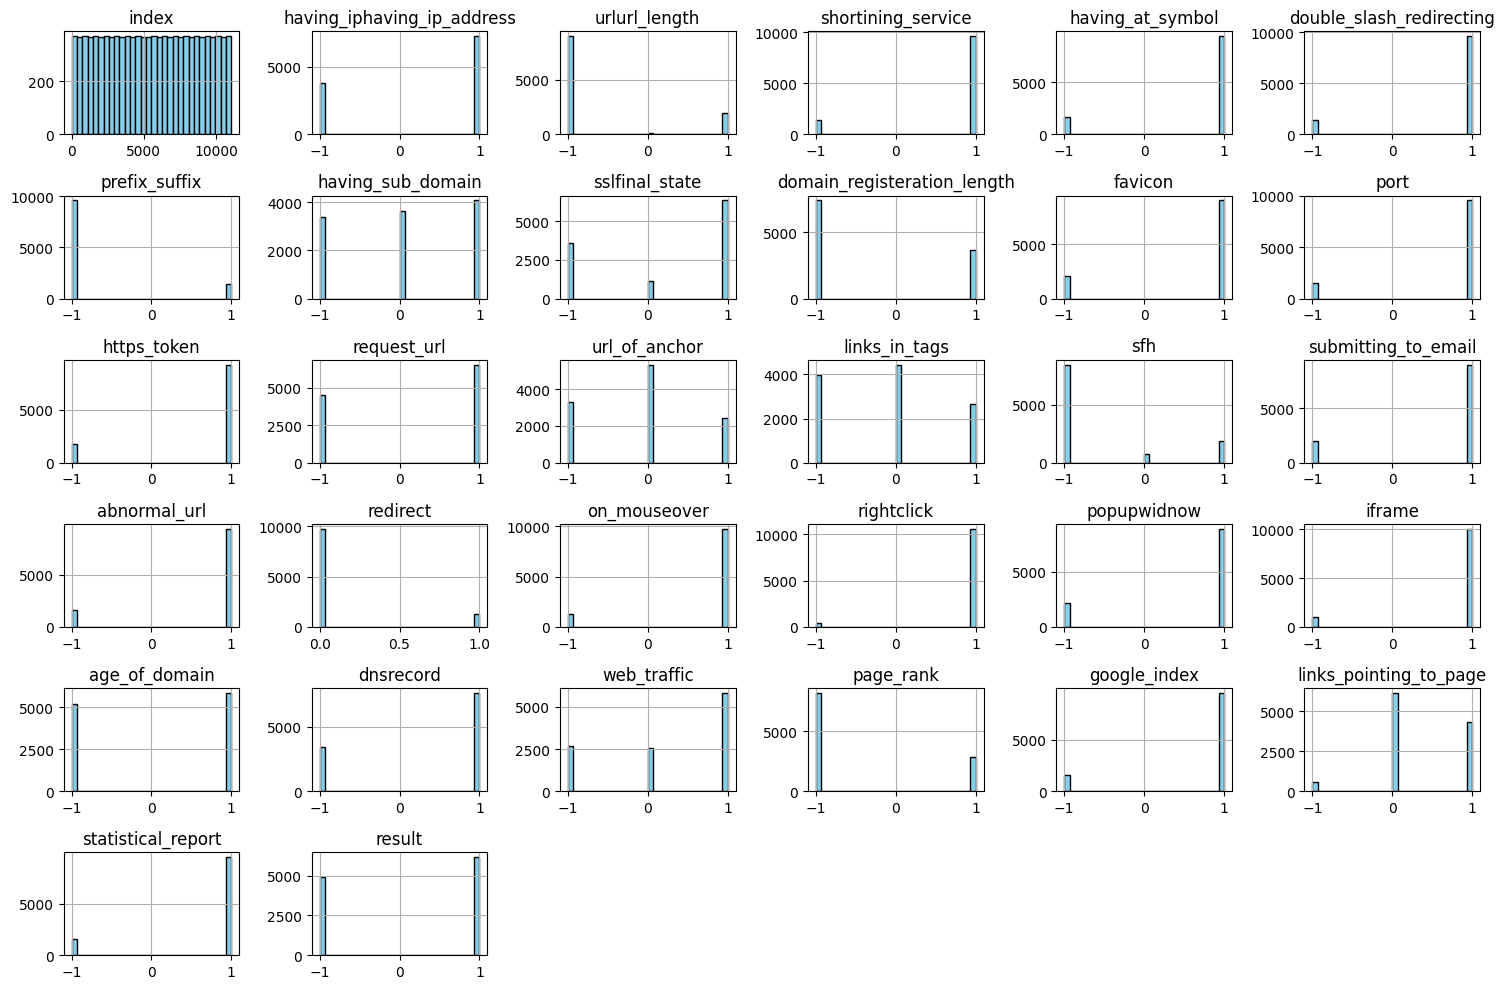

<ipython-input-55-2435e4389fce>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="result", data=df, palette="Set2")


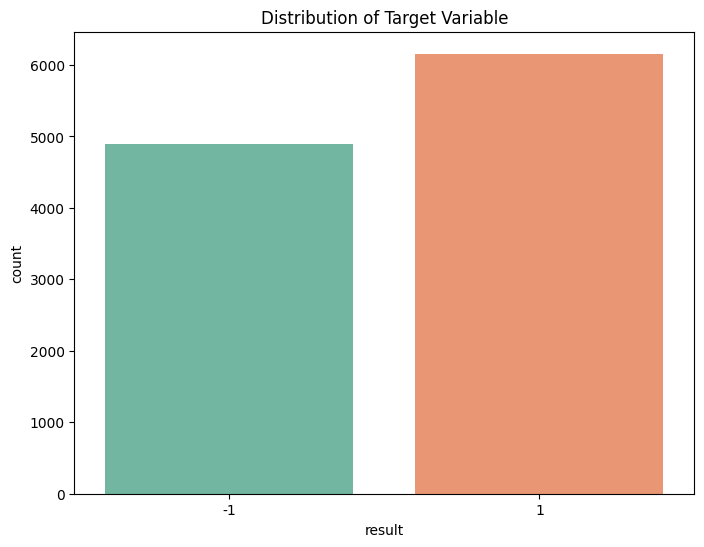

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature distributions
def plot_feature_distribution(df):
    plt.figure(figsize=(15, 10))
    df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
    plt.tight_layout()
    plt.show()

# Plot target variable distribution
def plot_target_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x="result", data=df, palette="Set2")
    plt.title("Distribution of Target Variable")
    plt.show()

# Call the functions
plot_feature_distribution(df)
plot_target_distribution(df)


In [56]:
from scipy.stats import boxcox
import numpy as np

# Check skewness of numeric columns
skewed_features = df.select_dtypes(include=[np.number]).skew()

# Log Transformation for highly skewed features (positive skew)
def log_transform_skewed_features(df, threshold=0.5):
    for col in skewed_features.index:
        if abs(skewed_features[col]) > threshold:
            df[col] = np.log1p(df[col])  # Log transformation (log(1+x))

log_transform_skewed_features(df)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<ipython-input-57-dc35bda580c5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set2")


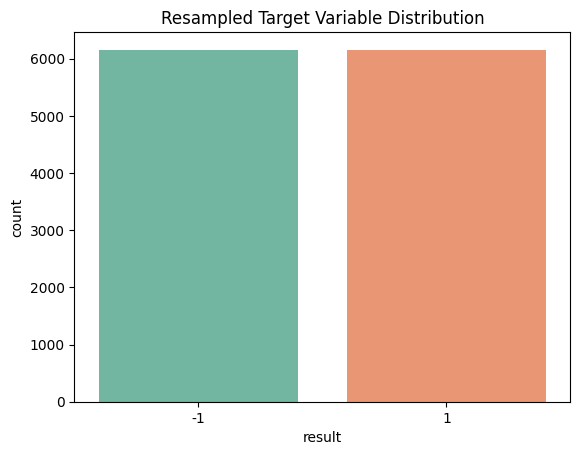

In [57]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution of the target variable
sns.countplot(x=y_resampled, palette="Set2")
plt.title("Resampled Target Variable Distribution")
plt.show()


In [58]:
# Split the resampled data into training and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a new model (Random Forest or any other classifier)
model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
model_resampled.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred_resampled = model_resampled.predict(X_test_resampled)
print(f"Model Accuracy after handling skewness and imbalance: {accuracy_score(y_test_resampled, y_pred_resampled) * 100:.2f}%")


Model Accuracy after handling skewness and imbalance: 97.52%


In [59]:


# 🔹 Step 7: Save Model
joblib.dump(model_resampled, "phishing_model.pkl")
print("✅ Model saved as phishing_model.pkl")


✅ Model saved as phishing_model.pkl


In [64]:
# 🔹 Step 8: Load the saved model
import pandas as pd

# Make sure to define the feature extraction function correctly
def extract_features(url):
    features = {
        "having_iphaving_ip_address": 0,  # Example feature - Replace with actual logic
        "urlurl_length": 0,  # Example feature - Replace with actual logic
        # Include all features used during training...
        # Add your actual feature extraction logic here
        # ... (rest of the features with lowercase names)
    }
    return features

# Load the trained model
model = joblib.load("phishing_model.pkl")
print("✅ Model loaded successfully!")

def predict_url(url):
    # Extract features from the input URL
    features = extract_features(url)

    # Ensure features match the order and casing used during training
    features_order = [
        "having_iphaving_ip_address", "urlurl_length", "shortining_service", "having_at_symbol", "double_slash_redirecting",
        "prefix_suffix", "having_sub_domain", "sslfinal_state", "domain_registeration_length", "favicon", "port",
        "https_token", "request_url", "url_of_anchor", "links_in_tags", "sfh", "submitting_to_email", "abnormal_url",
        "redirect", "on_mouseover", "rightclick", "popupwidnow", "iframe", "age_of_domain", "dnsrecord", "web_traffic",
        "page_rank", "google_index", "links_pointing_to_page", "statistical_report"
    ]

    # Create DataFrame with the exact order and casing of columns
    df = pd.DataFrame([features], columns=features_order)

    # Make the prediction
    prediction = model.predict(df)[0]

    # Return prediction result
    return "🚨 PHISHING URL" if prediction == 1 else "✅ SAFE URL"

# User Input
user_url = input("Enter URL to scan: ")
print(predict_url(user_url))

✅ Model loaded successfully!
Enter URL to scan: https://celebrationtrove.shop/mubarakho.mp4
✅ SAFE URL
